# Da Vinci Satellite: Bonaire Day Post Briefing Lecture

De inhoud die werd gecreëerd is de briefinglezing voorafgaand aan de excursie naar het grondstation. De inhoud toont informatieverwerking, filtering, modulatie en behandelt de inhoud van ruis.

# Modulatie en ruiseffecten

We weten dat modulatie ons in staat stelt om informatie te coderen in een signaal met een hogere frequentie, waardoor we de informatie met minder vermogen kunnen verzenden!

Laten we dus een willekeurig signaal genereren dat gebruikt zou kunnen worden. Voor dit signaal nemen we aan dat de satelliet zijn batterijniveau terugstuurt.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
from ipywidgets import interact, FloatSlider

In [ ]:
time = np.linspace(0, 1, 1000)

*Opdracht 1:* Hoe ziet het signaal eruit? Is het een lineair signaal, een kwadratisch signaal of een andere vorm?a

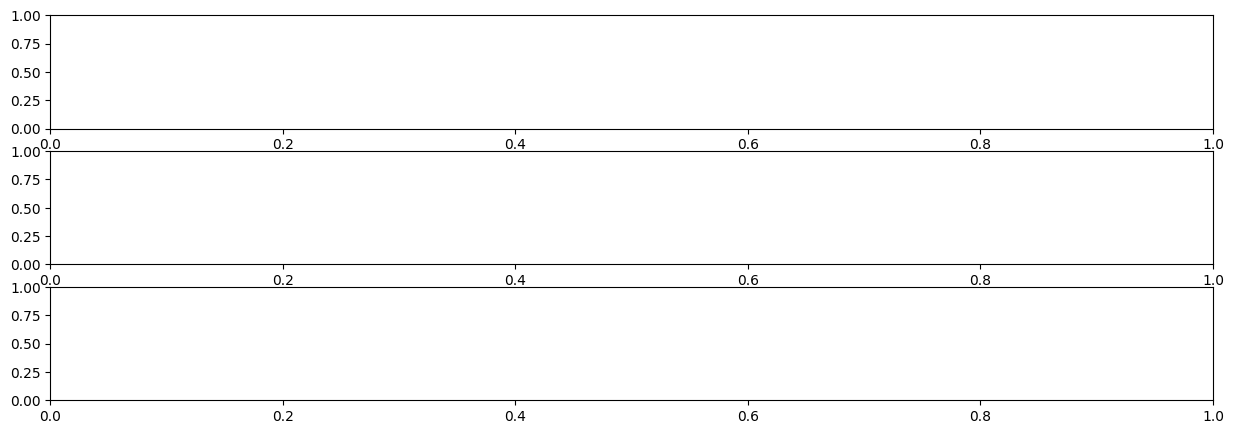

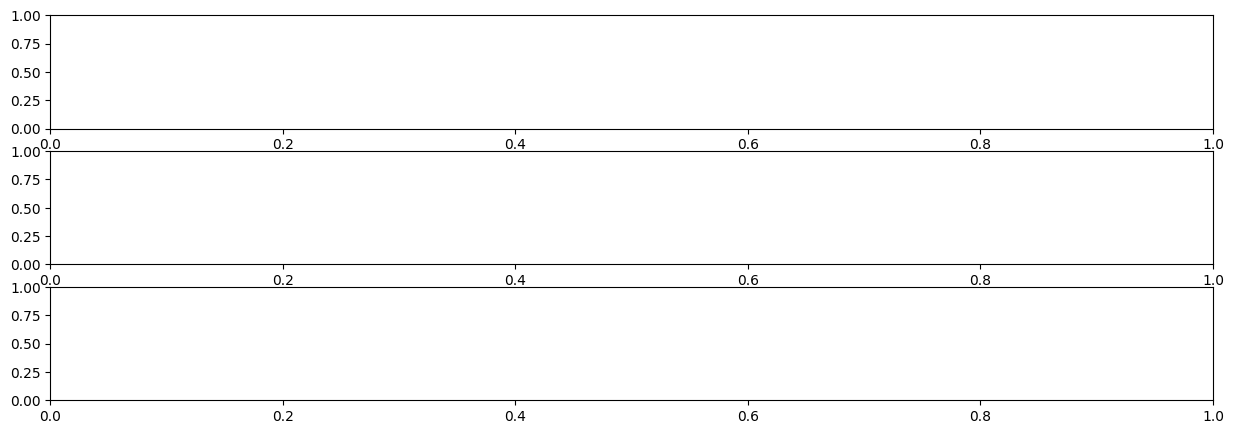

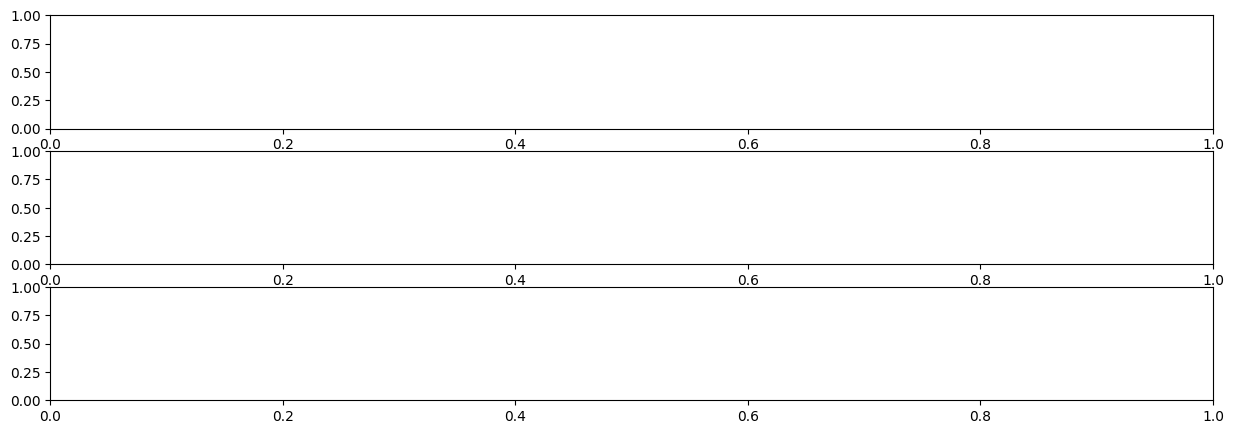

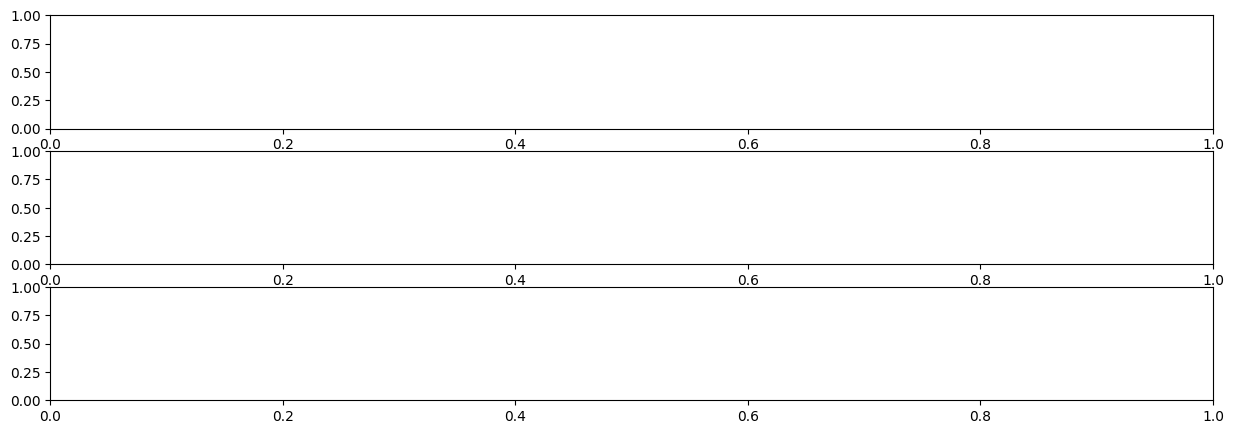

In [ ]:
%matplotlib inline
# Battery model function
def battery_model(tau, w):
    return 100 * np.exp(-tau * time) + w * np.abs(np.sin(2 * np.pi * 5 * time))

# Initial values
tau_init, w_init = 0.97, 1.0
battery_level = battery_model(tau_init, w_init)
yhat = savgol_filter(battery_level, 100, 5)

# Update function for interactive sliders
def update_batery(tau=0.97, w=1.0):
    new_battery_level = battery_model(tau, w)
    yhat = savgol_filter(new_battery_level, 100, 5)
    fig, ax = plt.subplots()
    plt.plot(time, yhat, label="Batterijniveau")
    plt.title("Batterijnivelau over de tijd")
    plt.xlabel("Tijd (Uur)")
    plt.ylabel("Batteryniveau (%)")
    plt.legend()
    plt.grid()
    fig.canvas.draw_idle()

# Create interactive sliders

tau_slider = FloatSlider(min=0.01, max=10.0, step=0.01, value=tau_init, description="Verval")
w_slider = FloatSlider(min=0.0, max=10.0, step=0.01, value=w_init, description="Oscillatie")

interact(update_batery, tau=tau_slider, w=w_slider)

Nu gaan we een golf met een zeer hoge frequentie genereren om onze informatie in te coderen. Dit wordt onze draaggolf en we maken er een cosinusfunctie van met een frequentie die hoog genoeg is.

In [ ]:
def carrier_wave(a_c, f):
    return a_c * np.cos([2*np.pi*f*t for t in time]), a_c

*Opdracht 2:* Probeer de frequentie van de golf te verhogen. Hoe verandert de golf?

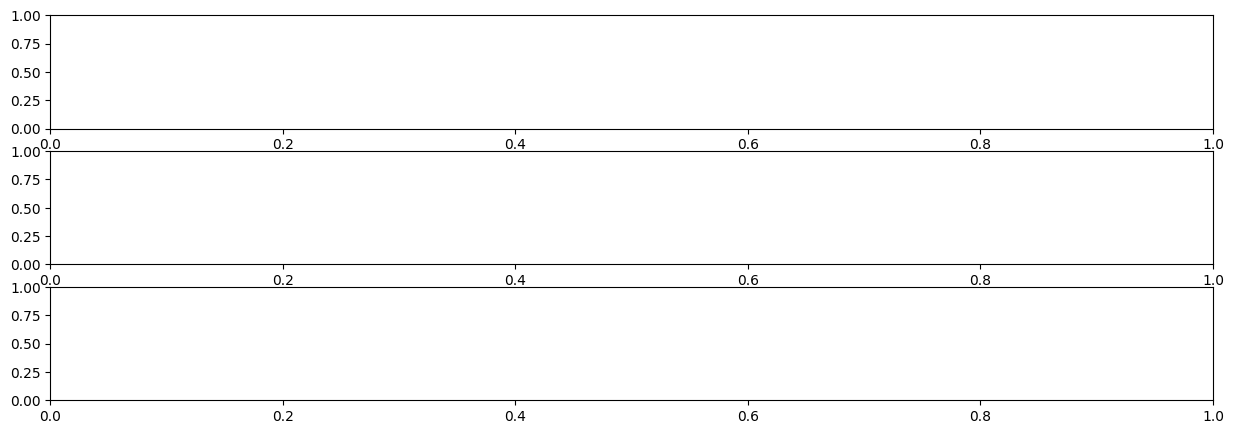

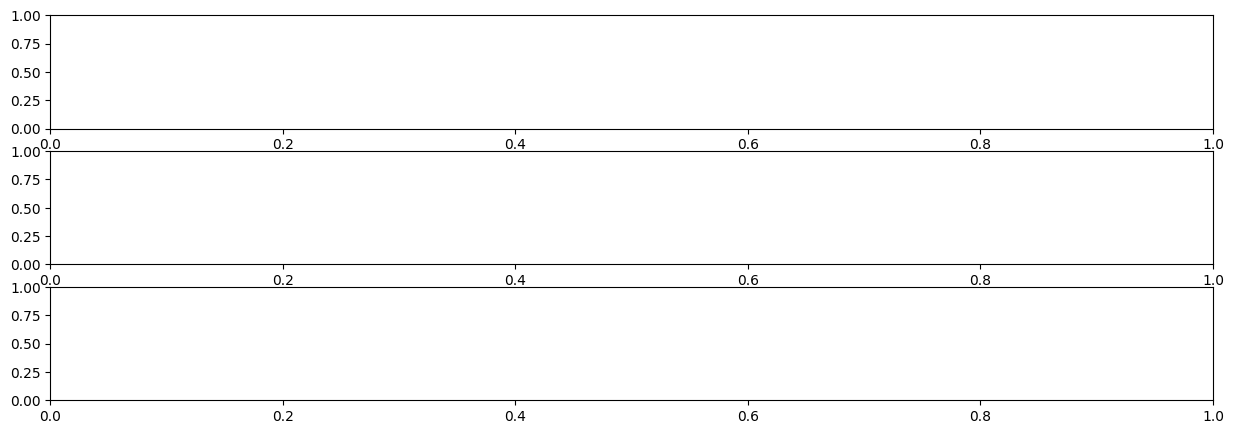

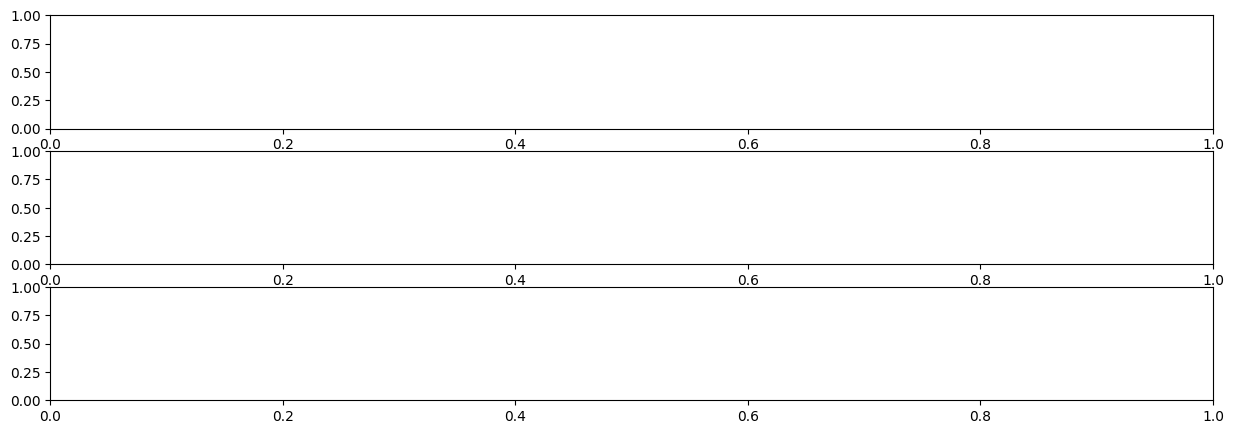

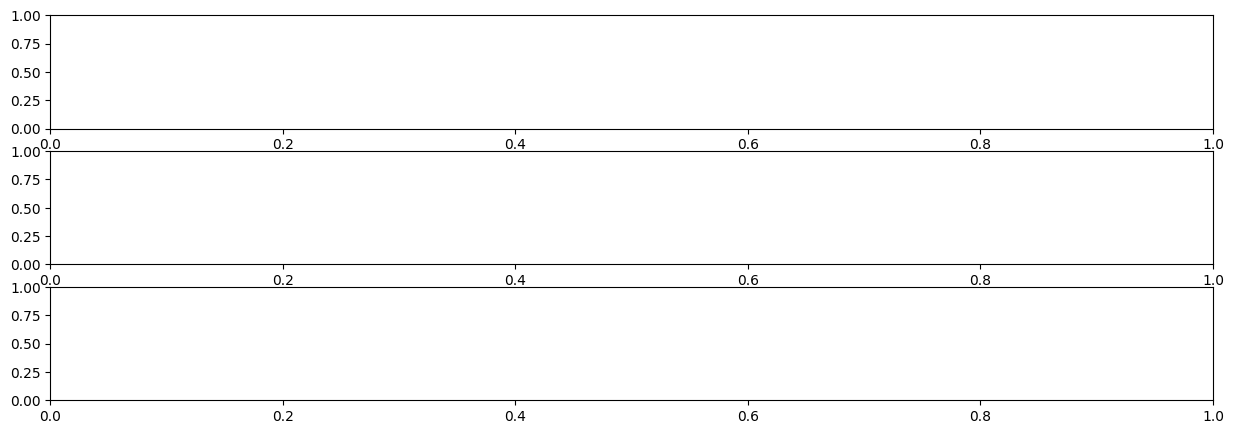

In [ ]:
# Initial values
a_c_init, f_init = 1., 1.
# Update function for interactive sliders
def update_carrier(ac = a_c_init, f = f_init):
    new_carrier_wave, _ = carrier_wave(a_c=ac, f=f)
    fig, ax = plt.subplots()
    plt.plot(time, new_carrier_wave)
    plt.title("Carrier Wave over Tijd")
    plt.xlabel("Tijd (Uur)")
    plt.ylabel("Amplitude")
    plt.grid()
    fig.canvas.draw_idle()

# Create interactive sliders
a_c_slider = FloatSlider(min=-10, max=10.0, step=0.01, value=a_c_init, description="Amplitude")
f_slider = FloatSlider(min=0, max=20, step=0.01, value=f_init, description="Frequentie")

interact(update_carrier, a_c=a_c_slider, f=f_slider)

Als we ze samen moduleren, kunnen we nu dezelfde informatie verzenden, maar met meer frequentie en dus minder vermogen! Modulatie in termen van amplitude kan worden gedaan met de volgende formule:

$$ x_{mod} = (A_{carrier} + x_{information}) \cdot \cos{(\omega_{c}t)} $$

In [ ]:
def x_mod(tau, w, a_c, f):
    battery = battery_model(tau, w)
    carrier, amplitude = carrier_wave(a_c, f)
    return (amplitude + battery) * np.cos([2*np.pi*f*t for t in time])

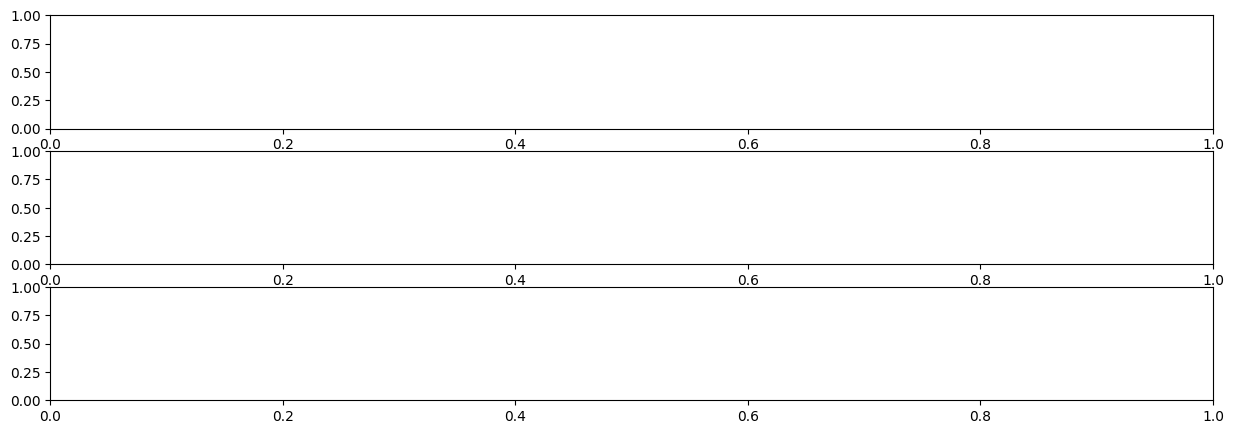

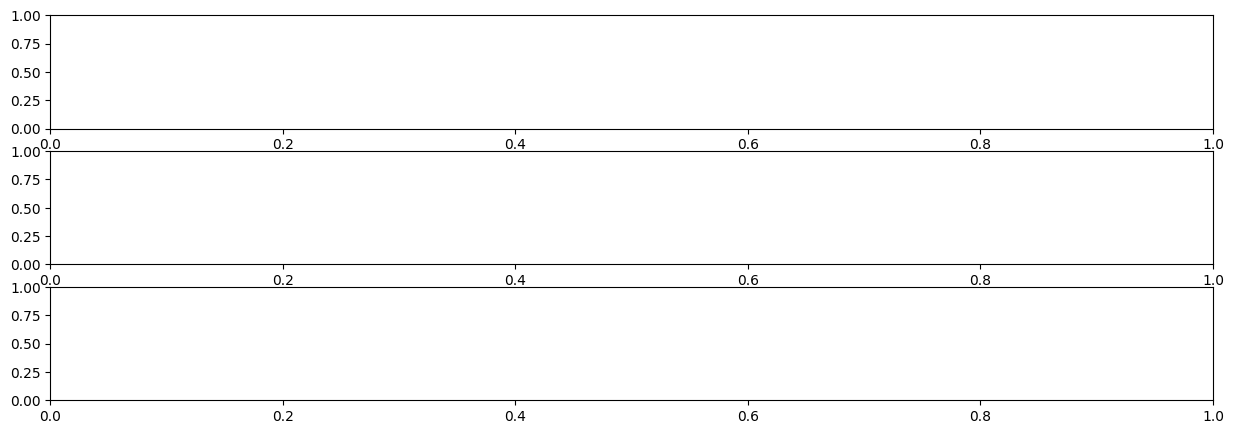

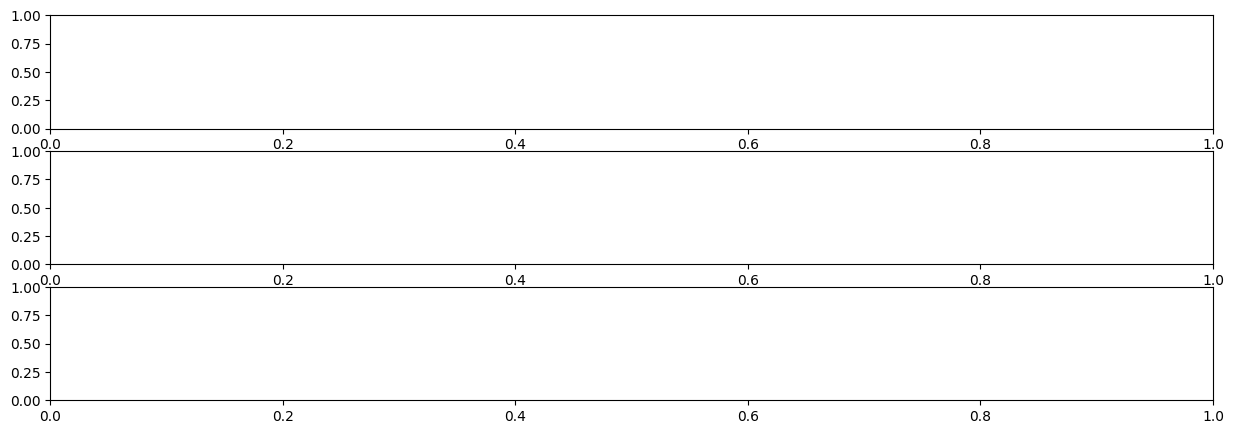

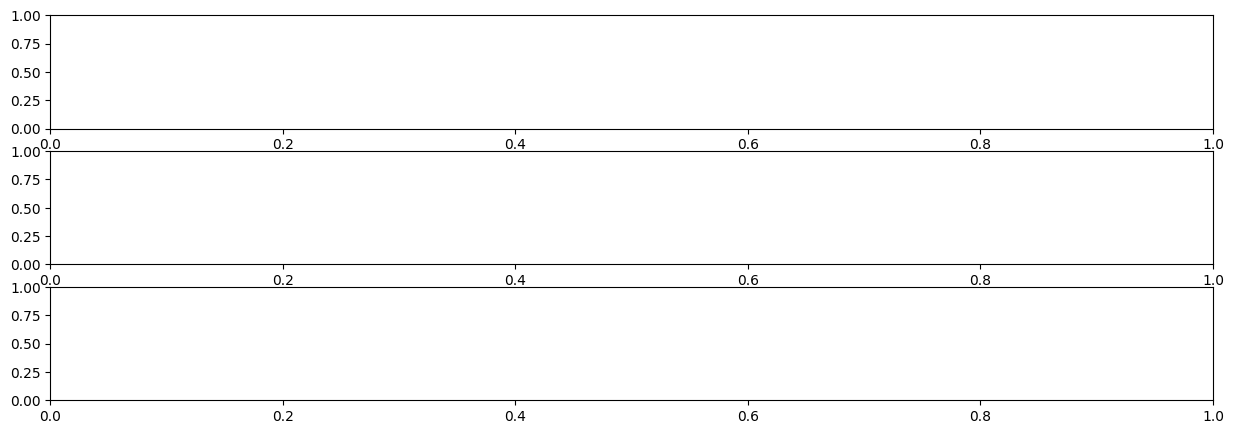

In [ ]:
# Initial values
# Update function for interactive sliders
def update_x_mod(tau=tau_init, w=w_init, ac = a_c_init, f = f_init):
    new_x_mod = x_mod(tau, w, ac, f)
    fig, ax = plt.subplots()
    plt.plot(time, new_x_mod)
    plt.title("Ampltiude Modulatie over Tijd")
    plt.xlabel("Tijd (Uur)")
    plt.ylabel("Amplitude")
    plt.grid()
    fig.canvas.draw_idle()

interact(update_x_mod, tau=tau_slider, w=w_slider, a_c=a_c_slider, f=f_slider)

We kunnen er ook voor kiezen om de informatie te frequentiemoduleren. Hierbij wordt de frequentie van de draaggolf aangepast om de informatie te dragen.

$$ x_{mod} = A_{carrier}\cos(\omega_c t + x_{information})$$

In [ ]:
time_new = np.linspace(0, 10, 1000)

In [ ]:
def new_battery_model(tau, w, t):
    return 100 * np.exp(-tau * t) + w * np.abs(np.sin(2 * np.pi * 5 * t))

In [ ]:
def x_mod_f(tau, w, a_c, f):
    battery = battery_model(tau, w)
    carrier, amplitude = carrier_wave(a_c, f)
    cumulative_sum_battery = np.cumsum(new_battery_model(tau, w, time_new))
    return (amplitude) * np.cos([2*np.pi*(f)*t for t in time] + 2*np.pi*cumulative_sum_battery)

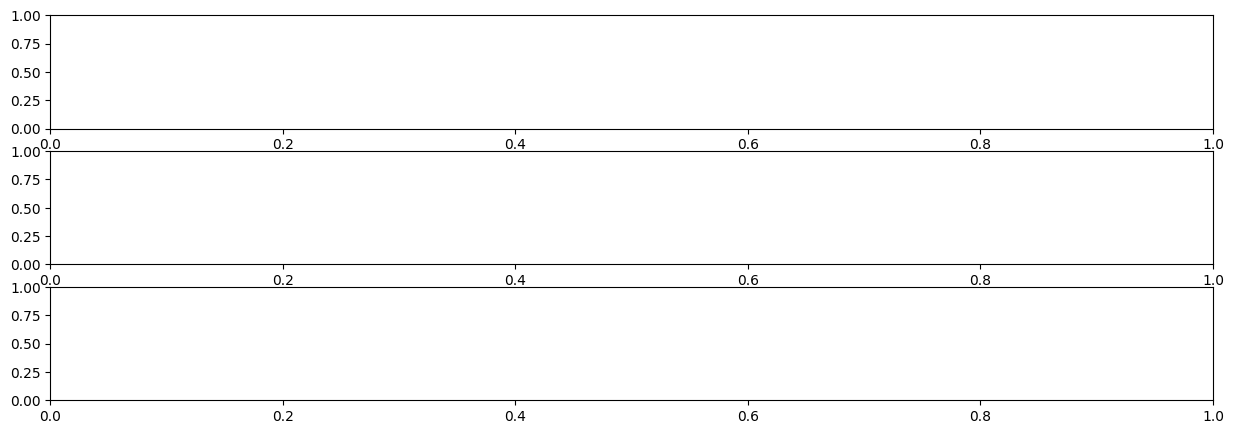

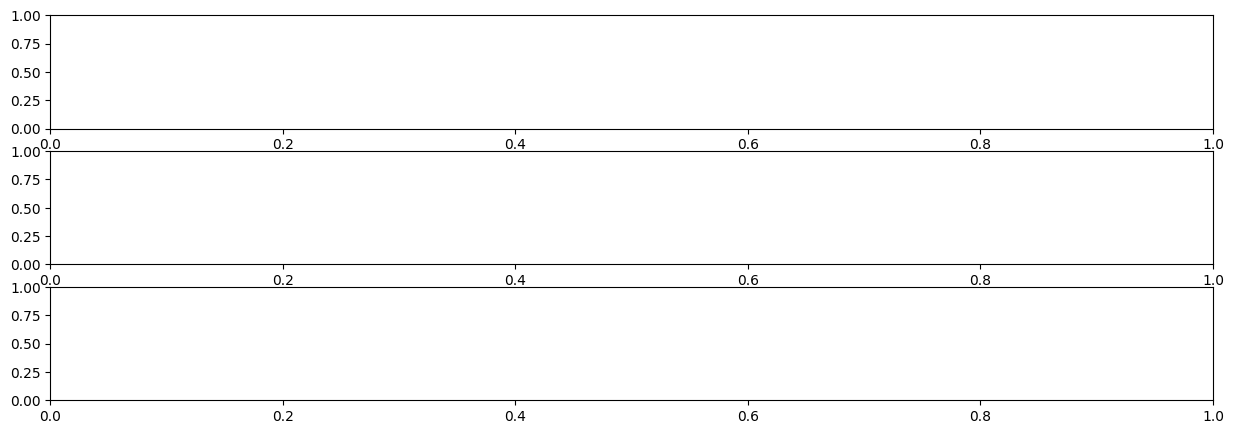

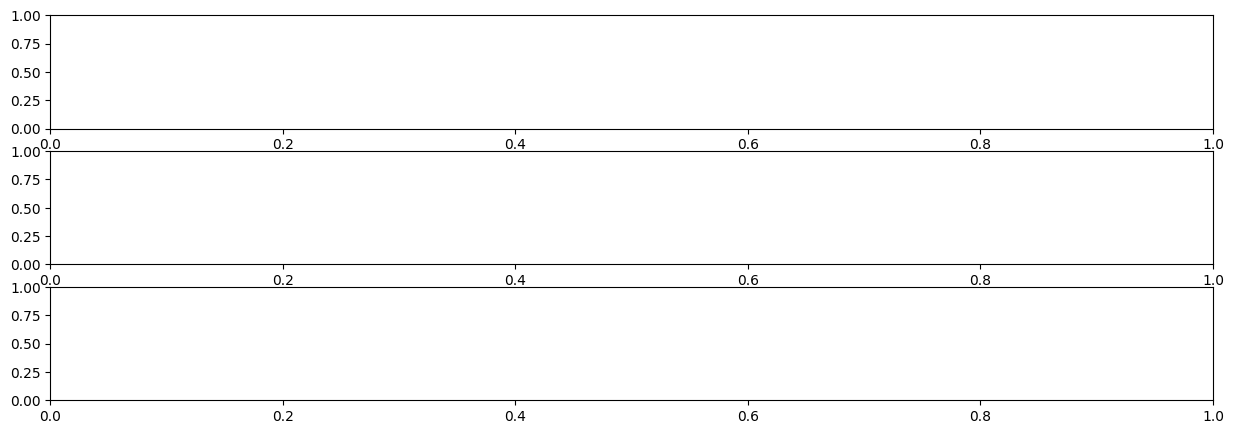

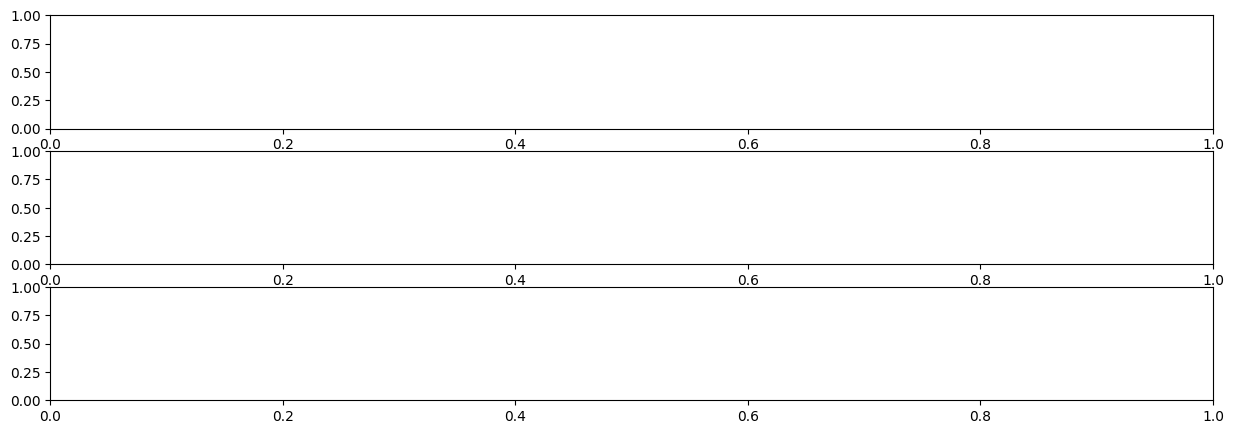

In [ ]:
# Initial values
# Update function for interactive sliders
def update_x_mod_f(tau=tau_init, w=w_init, ac = a_c_init, f = f_init):
    new_x_mod = x_mod_f(tau, w, ac, f)
    fig, ax = plt.subplots()
    plt.plot(time_new, new_x_mod)
    plt.title("Ampltiude Modulatie over Tijd")
    plt.xlabel("Tijd (Uur)")
    plt.ylabel("Amplitude")
    plt.grid()
    fig.canvas.draw_idle()

interact(update_x_mod_f, tau=tau_slider, w=w_slider, a_c=a_c_slider, f=f_slider)

## Noise

Vervolgens gaan we een soort ruis genereren die wordt veroorzaakt in de signaaloverdracht. Deze ruis is representatief voor de gecombineerde effecten van:

*Opdract 3:* wat kunnen de geluidsbronnen zijn?


In [ ]:
def noise(noise_strength):
    return noise_strength * np.random.normal(0, 1, len(time))

In [ ]:
# Initial values
# Update function for interactive sliders
noise_strength_init = 0.0
def update_noise(ns=noise_strength_init):
    new_x_mod = noise(noise_strength=ns)
    fig, ax = plt.subplots()
    plt.plot(time_new, new_x_mod)
    plt.title("Ampltiude Modulatie over Tijd")
    plt.xlabel("Tijd (Uur)")
    plt.ylabel("Amplitude")
    plt.grid()
    fig.canvas.draw_idle()

noise_strength_slider = FloatSlider(min=0, max=10, step=0.01, value=noise_strength_init, description="Ruisssterkte")

interact(update_noise, noise_strength=noise_strength_slider)

Laten we eens kijken hoe het geluid eruit ziet!

*Opdracht 4:* En als we het signaalvermogen variëren, wat voor invloed heeft dat dan op het signaal? Voer het onderstaande codeblok uit om.

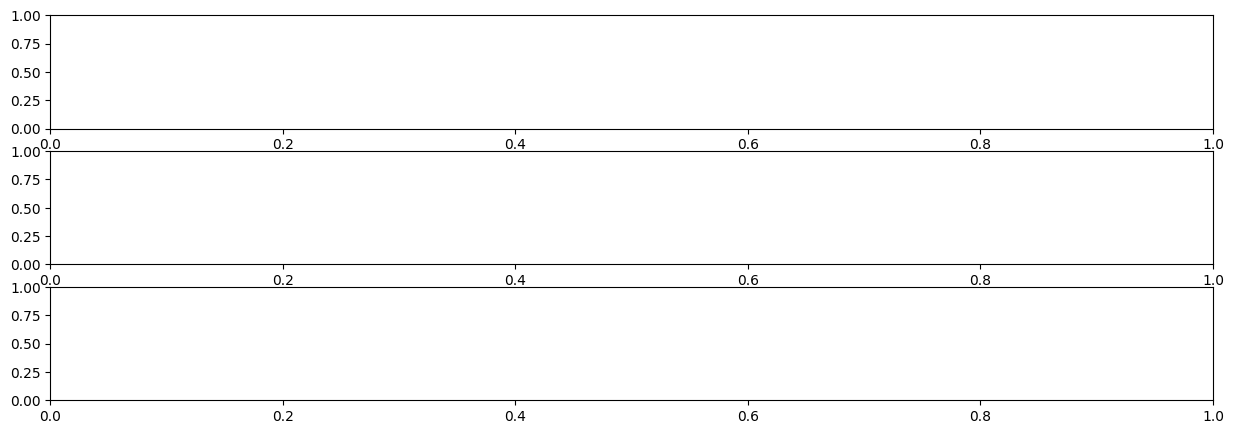

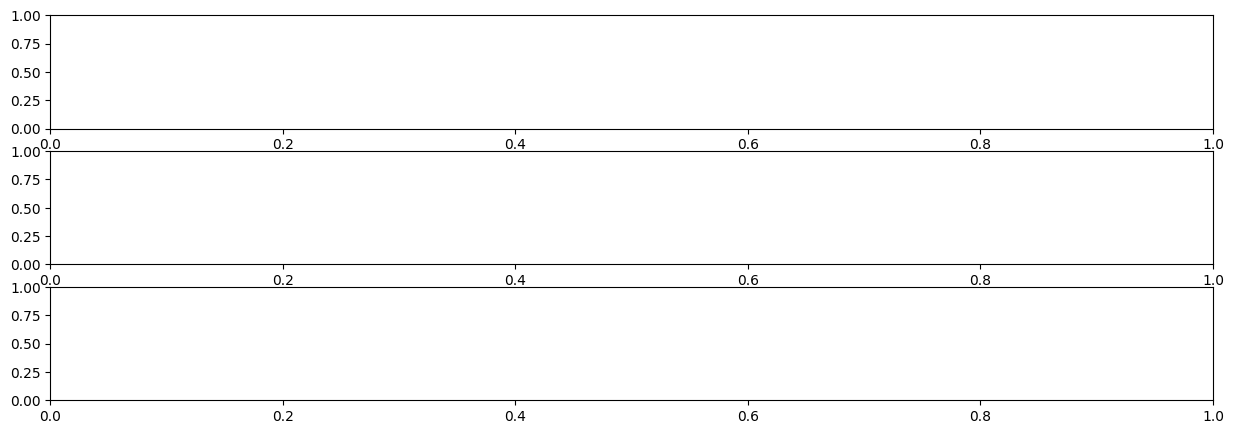

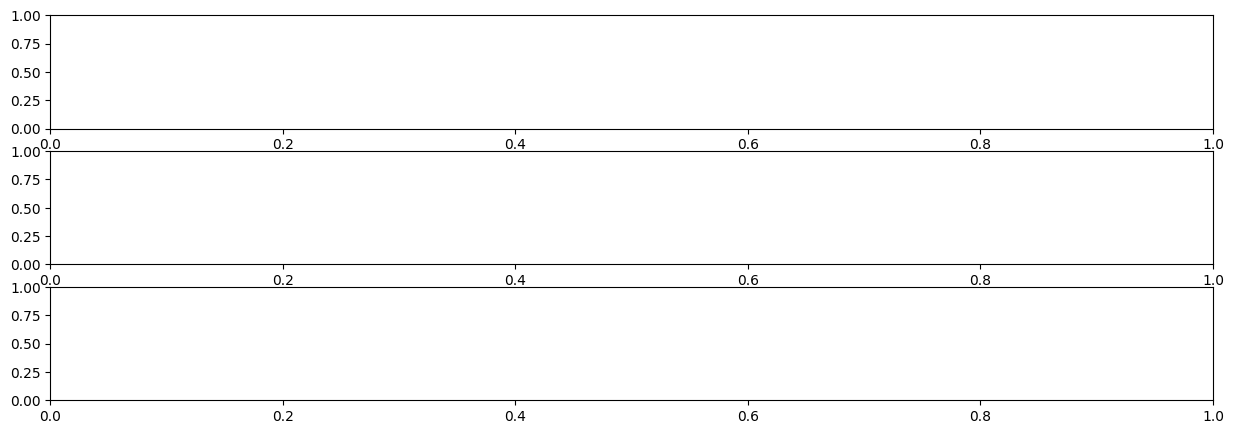

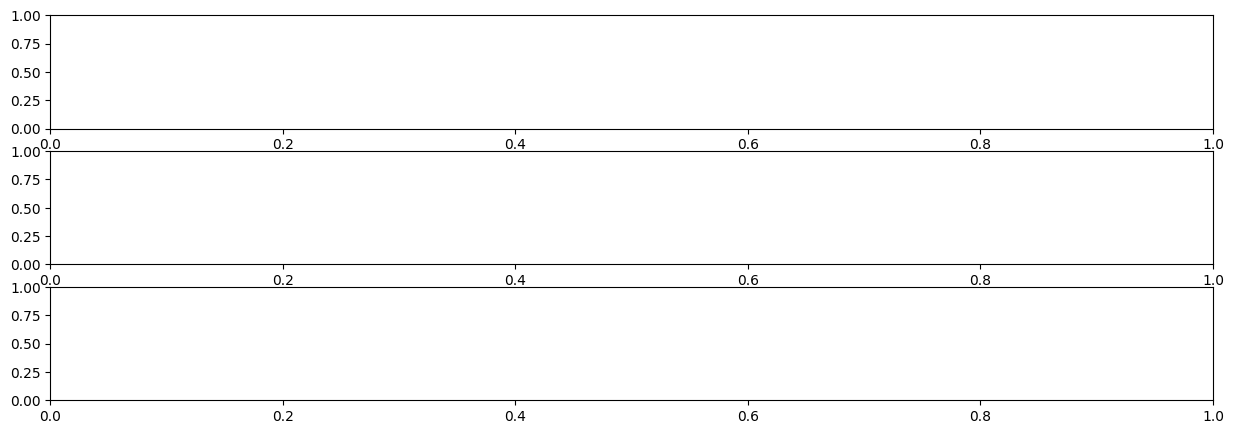

In [ ]:
# Update function for interactive sliders
def update_batery_noise(tau=0.97, w=1.0, ns=noise_strength_init):
    new_battery_level = battery_model(tau, w) + noise(ns)
    yhat = savgol_filter(new_battery_level, 100, 5)
    fig, ax = plt.subplots()
    plt.plot(time, yhat, label="Batterijniveau met ruis")
    plt.title("Batterijnivelau over de tijd")
    plt.xlabel("Tijd (Uur)")
    plt.ylabel("Batteryniveau met ruis (%)")
    plt.legend()
    plt.grid()
    fig.canvas.draw_idle()

# Create interactive sliders
interact(update_batery_noise, tau=tau_slider, w=w_slider, ns=noise_strength_slider)

*Opdracht 5:* En wat als we deze signalen moduleren? Voer het onderstaande codeblok uit om.

In [ ]:
# Update function for interactive sliders
def update_batery_noise_modulated(tau=0.97, w=1.0, a_c=a_c_init, f=f_init, ns=noise_strength_init):
    fig, ax = plt.subplots(3, 1, figsize=(15, 5))
    battery = battery_model(tau, w)
    carrier, amplitude = carrier_wave(a_c, f)
    new_battery_level = battery_model(tau, w) + noise(ns)
    x_mod_signal = (amplitude + new_battery_level) * np.cos([2*np.pi*f*t for t in time])
    x_mod_signal_freq = (amplitude) * np.cos([2*np.pi*(f)*t for t in time] + 2*np.pi* np.cumsum(new_battery_model(tau, w, time)))
    ax[0].plot(time, new_battery_level, label="Batterijniveau met ruis")
    ax[0].set_title("Batterijnivelau over de tijd")
    ax[0].set_xlabel("Tijd (Uur)")
    ax[0].set_ylabel("Batteryniveau met ruis (%)")
    # ax[0].legend()
    ax[0].grid()
    fig.canvas.draw_idle()
    ax[1].plot(time, x_mod_signal, label="Amplitude Modulatie")
    ax[1].set_title("Amplitude Modulatie over de tijd")
    ax[1].set_xlabel("Tijd (Uur)")
    ax[1].set_ylabel("Amplitude")
    # ax[1].legend()
    ax[1].grid()
    fig.canvas.draw_idle()
    ax[2].plot(time, x_mod_signal_freq, label="Frequentie Modulatie met frequentie")
    ax[2].set_title("Frequentie Modulatie over de tijd")
    ax[2].set_xlabel("Tijd (Uur)")
    ax[2].set_ylabel("Amplitude")
    # ax[2].legend()
    fig.subplots_adjust(hspace=1.1)  # Increases vertical spacing between subplots

    fig.canvas.draw_idle()

interactive(children=(FloatSlider(value=5.33, description='Verval', max=10.0, min=0.01, step=0.01), FloatSlide…

<function __main__.update_batery_noise_modulated(tau=0.97, w=1.0, a_c=1.0, f=1.0, ns=0.0)>

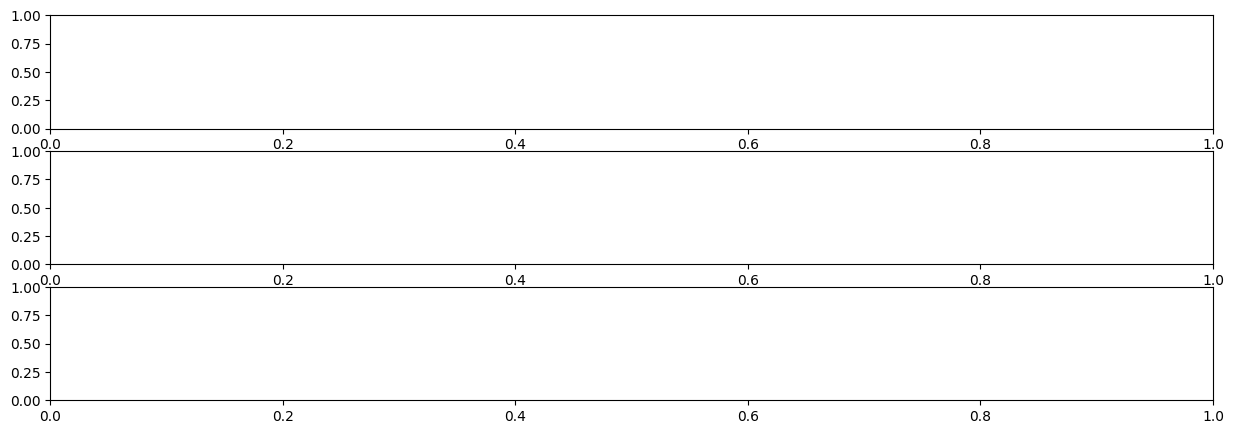

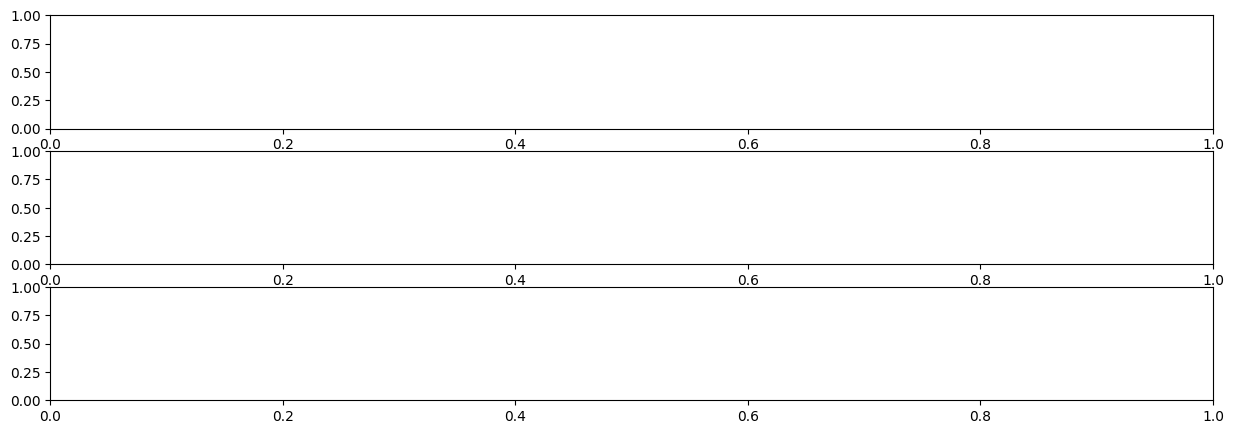

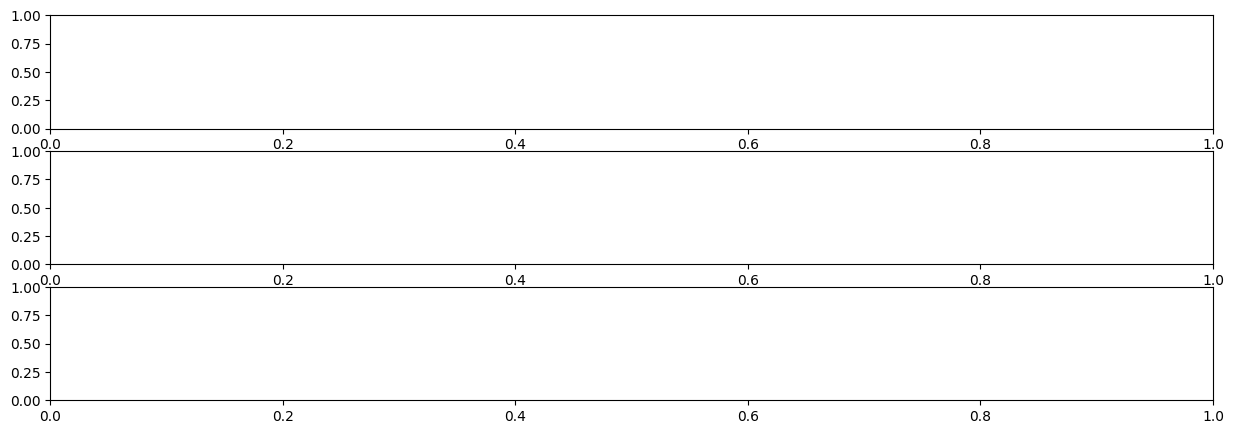

In [152]:
interact(update_batery_noise_modulated, tau=tau_slider, w=w_slider, a_c=a_c_slider, f=f_slider, ns=noise_strength_slider)

*Opdracht 6:* Van welke kunnen we de informatie nog gebruiken? Welk type modulatie is robuuster tegen deze ruis?